(sympy)=
# Computeralgebra mit SymPy

In diesem Abschnitt wollen wir das Python-Modul **SymPy** vorstellen, welches uns ermöglicht  symbolische Berechnungen durchzuführen. Insbesondere werden wir lernen, wie wir mit mathematischen Ausdrücken arbeiten können, wie wir Funktionen differenzieren und integrieren, und wie wir (nicht)lineare Gleichungssysteme und Differentialgleichungen lösen.

Wir müssen zunächst das Paket installieren, beispielsweise über unsere **conda**-Umgebung

```bash
conda install -c conda-forge sympy
```

und anschließend in unser Python-Skript einbinden:

In [1]:
import sympy as sy

## Arbeiten mit Funktionen

Beginnen wir zunächst damit eine mathematische Funktion zu definieren. Dazu müssen wir die veränderliche Variable kennzeichnen und anschließend die Funktionsvorschrift eingeben:

In [2]:
x = sy.symbols('x')
f = 1./3*x**3 - 2.*x**2 + 3.

Die Variable `x` ist vom Typ

In [3]:
type(x)

sympy.core.symbol.Symbol

und der Ausdruck `f` vom Typ

In [4]:
type(f)

sympy.core.add.Add

Objekte vom Typ `sympy.core.add.Add` entstehen bei der Summation von, in unserem Fall

In [5]:
len(f.args)

3

symbolischen Ausdrücken, welche wiederrum aus anderen Rechenoperationen hervorgegangen sind:

In [6]:
g1 = f.args[0]
print("Erster Summand", g1, "vom Typ", type(g1))

Erster Summand 3.00000000000000 vom Typ <class 'sympy.core.numbers.Float'>


In [7]:
g2 = f.args[1]
print("Zweiter Summand", g2, "vom Typ", type(g2))

Zweiter Summand 0.333333333333333*x**3 vom Typ <class 'sympy.core.mul.Mul'>


In [8]:
g3 = f.args[2]
print("Dritter Summand", g3, "vom Typ", type(g3))

Dritter Summand -2.0*x**2 vom Typ <class 'sympy.core.mul.Mul'>


Der Ausdruck `g1` ist nur die Zahl `3.0` und `g2` und `g3` sind vom Typ `sympy.core.mul.Mult`, sind also Ausdrücke die aus der Multiplikation weiterer Ausdrücke hervorgegangen sind. Ein mathematischer Ausdruck wird schließlich in Form eines Binärbaums dargestellt. Die genaue Darstellung bekommen wir wie folgt:

In [9]:
sy.srepr(f)

"Add(Mul(Float('0.33333333333333331', precision=53), Pow(Symbol('x'), Integer(3))), Mul(Integer(-1), Float('2.0', precision=53), Pow(Symbol('x'), Integer(2))), Float('3.0', precision=53))"

Vielleicht haben wir durch diese Betrachtung schon eine grobe Vorstellung wie symbolische Ausdrücke funktionieren. Über die genauen Details wollen wir uns aber hier keine weiteren Gedanken machen.

Schauen wir uns an, was wir mit der eben definierten Funktion anstellen können

### Differenzieren

In [10]:
Df = f.diff(x)
print("Ableitung:")
Df

Ableitung:


1.0*x**2 - 4.0*x

bzw. mit der freien Funktion `sympy.diff`

In [11]:
Df = sy.diff(f,x)
print("Ableitung:")
Df

Ableitung:


1.0*x**2 - 4.0*x

Natürlich kann SymPy auch kompliziertere Funktionen ableiten. Zu beachten ist hier, dass wir für alle mathematischen Funktionen die entsprechenden Funktionen aus dem SymPy-Modul verwenden:

In [12]:
g = sy.exp(-x**2)*sy.sin(x)
g.diff(x)

-2*x*exp(-x**2)*sin(x) + exp(-x**2)*cos(x)

### Integration

Mit der Methode `integrate` können wir die Stammfunktion einer Funktion berechnen lassen

In [13]:
F = f.integrate(x)
print("Stammfunktion:")
F

Stammfunktion:


0.0833333333333333*x**4 - 0.666666666666667*x**3 + 3.0*x

Manchmal ist aber auch SymPy überfordert. Bei zu komplizierten Funktionen gibt die `integrate`-Methode lediglich

In [14]:
G = g.integrate(x)
print("Stammfunktion:")
G

Stammfunktion:


Integral(exp(-x**2)*sin(x), x)

zurück. Wir können auch **bestimmte Integrale** berechnen, indem wir als zweiten Parameter ein Tupel bestehend aus der Integrationsvariablen und den beiden Grenzen angeben:

In [15]:
v = sy.integrate(f, (x,0,1))
print("Integral über f mit Grenzen 0 und 1:")
v

Integral über f mit Grenzen 0 und 1:


2.41666666666667

Um **uneigentliche Integrale**, beispielsweise $\int_0^\infty g(x)\,\mathrm dx$ zu berechnen nutzt man als obere Grenze einfach `sy.oo` (unendlich):

In [16]:
g = x**2*sy.exp(-x)
v = sy.integrate(g,(x,0,sy.oo))
print("Uneigentliches Inegral:")
v

Uneigentliches Inegral:


2

### Potenzreihen

SymPy bietet viele weitere nützliche Funktionen, beispielsweise `sympy.series(...)`. Diese Funktion berechnet eine Potenzreihe beliebiger Ordnung für eine gegebene Funktion:

In [17]:
G = g.series(x, 0, 4) # Taylorapproximation im Entwicklungsunkt 0, bis Ordnung 4
print("Potenzreihe:")
G

Potenzreihe:


x**2 - x**3 + O(x**4)

In [18]:
G = G.removeO()
print("Potenzreihe ohne Restglied:")
G

Potenzreihe ohne Restglied:


-x**3 + x**2

### Plotten

SymPy stellt auch ein direktes Interface zu MatplotLib bereit. Der Unterschied zu den in {ref}`visualisation` gelernten Funktionen ist, dass wir hier nicht erst ein Gitter für die `x`-Werte anlegen müssen. Dies geschieht in den `plot`-Funktionen von SymPy automatisch. Wir müssen lediglich die SymPy-Expression und gegebenenfalls zusätzliche Funktionsparameter der `sympy.plot`-Funktion übergeben:

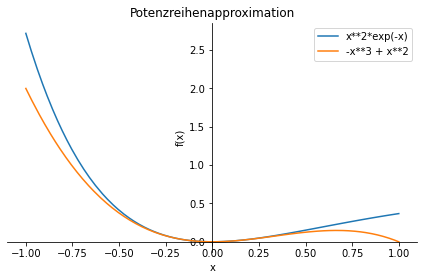

In [19]:
p1 = sy.plot(g, (x,-1,1), show=False, legend=True, title="Potenzreihenapproximation")
p2 = sy.plot(G, (x,-1,1), show=False)

p1.append(p2[0])
p1.show()

```{admonition} Übungsaufgabe
:class: tip

Berechne die Ableitung, die Stammfunktion, und erstelle einen Plot der Funktionen

$$
f_1(x) = \arctan(x),\quad f_2(x) = \sinh(x),\quad f_3(x) = x\,\ln(x).
$$

```

## Nichtlineare Gleichungen

Mit SymPy können wir auch nichtlineare Gleichungen bzw. Gleichungssysteme lösen. Dies geschieht algebraisch, sofern möglich. 

Die Funktionen, welche wir dafür benötigen, ist `sympy.solve(...)`. Wir konstruieren ein einfaches Beispiel in dem wir die stationären Punkte der Funktion $f(x)=x\,\ln(x)$ berechnen:

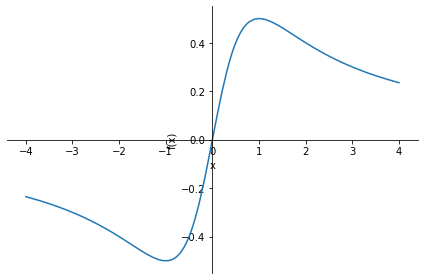

Extrema at [-1, 1]


In [20]:
f = x/(x**2+1)
Df = f.diff()
p3 = sy.plot(f,(x,-4,4))  # Plot function

eq = sy.Eq(Df, 0)         # Create equation with lhs DF and rhs 0
sols = sy.solve(eq, x)    # Solve the equation
print("Extrema at", sols) # Print solution

Die stationären Punkte werden in einer Liste abgelegt. Über diese können wir anschließend iterieren. So wie in folgender Probe:

In [21]:
for sol in sols:
    print("Stationärer Punkt x =", sol)
    print("Ist vom Typ", type(sol))
    print("Erfüllt f'(x) =", Df.subs(x, sol))

Stationärer Punkt x = -1
Ist vom Typ <class 'sympy.core.numbers.NegativeOne'>
Erfüllt f'(x) = 0
Stationärer Punkt x = 1
Ist vom Typ <class 'sympy.core.numbers.One'>
Erfüllt f'(x) = 0


Auch **Systeme von Gleichungen** können mit diesem Befehl gelöst werden wie folgendes Beispiel zeigt:

In [22]:
x1, x2 = sy.symbols("x1 x2")

equations = [
    sy.Eq(2*x1 + 1*x2, 10),
    sy.Eq(1*x1 - 2*x2, 11) 
]

sols = sy.solve(equations)
sols

{x1: 31/5, x2: -12/5}

Die zu lösenden Gleichungen wurden hier einfach in eine Liste gepackt und dem `solve`-Befehl übergeben. Das Ergebnis ist hier ein Objekt vom Typ

In [23]:
type(sols)

dict

**Dictionary** ist auch eine Containerklasse, welche Key-Value-Paare abspeichert. Der Key (Schlüssel) ist hier der Name der Variable und der Value  deren Wert. Wir können auch mit einer `for`-Schleife über ein Dictionary iterieren. Die lokale Variable `a` in folgendem Beispiel ist dabei lediglich der Schlüssel. Den zugehörigen Wert bekommt man mit `sols[a]`:

In [24]:
print("Die Lösung unseres Gleichungssystems lautet")
for a in sols:
    print(a, "=", sols[a])

Die Lösung unseres Gleichungssystems lautet
x1 = 31/5
x2 = -12/5


Alternativ lassen sich **lineare Gleichungssysteme** auch mit den Befehl `sympy.linsolve(...)` lösen:

In [25]:
x1, x2, x3 = sy.symbols('x1, x2, x3')
sols = sy.linsolve([2*x1+3*x2-6*x3 - 3, 1*x1-3*x2+3*x3 - 2], (x1,x2,x3))
sols

{(x3 + 5/3, 4*x3/3 - 1/9, x3)}

Für dieses System aus 2 Gleichungen und 3 Unbekannten hat der `linsolve`-Befehl eine Lösung ermittelt, die noch von $x_3$ abhängt. Natürlich erwarten wir in diesem Beispiel unendlich viele Lösungen. Mit der `subs`-Methode können wir die freie Variable mit einem speziellen Wert substituieren:

In [26]:
for sol in sols:
    print("Allgemeine Lösung :", sol)
    print("Spezielle Lösung  :", sol.subs('x3', 0))
    print("Spezielle Lösung  :", sol.subs('x3', 2))

Allgemeine Lösung : (x3 + 5/3, 4*x3/3 - 1/9, x3)
Spezielle Lösung  : (5/3, -1/9, 0)
Spezielle Lösung  : (11/3, 23/9, 2)


## Gewöhnliche Differentialgleichungen

Auch einfache Differentialgleichungen können mit SymPy gelöst werden. Zunächst müssen wir dafür eine Differentialgleichung definieren. Dazu legen wir zunächst ein Objekt vom Typ `Function` an und definieren die Differentialgleichung als mathematischen Ausdruck. Die Funktion `Derivative` erlaubt es die Ableitungen der gesuchten Funktion einzuarbeiten:

In [27]:
y = sy.Function('y')
ode = sy.Derivative(y(x),x,x) + 2*sy.Derivative(y(x),x) - 6*y(x) - sy.exp(3*x)
ode

-6*y(x) - exp(3*x) + 2*Derivative(y(x), x) + Derivative(y(x), (x, 2))

Die Funktion zum Lösen der Differentialgleichung ist `sympy.dsolve` (das "d" steht für differential equation). Wir übergeben den eben für die ODE definierten Ausdruck sowie die Funktion nach der wir diese lösen sollen:

In [28]:
sol = sy.dsolve(ode, y(x))
sol

Eq(y(x), C1*exp(x*(-1 + sqrt(7))) + C2*exp(x*(-sqrt(7) - 1)) + exp(3*x)/9)

In [29]:
type(sol)

sympy.core.relational.Equality

Das Ergebnis ist ein Objekt vom Tyo `Equality`, bestehend aus einer linken und einer rechten Seite einer Gleichung. Um die rechte Seite zu extrahieren und daraus eine Funktion zu definieren nutzen wir

In [30]:
f = sol.rhs
type(f)

sympy.core.add.Add

Unsere eben berechnete Funktion hängt von folgenden Variablen ab:

In [31]:
f.free_symbols

{C1, C2, x}

Dass unsere Lösung von 2 beliebigen Konstanten `C1` und `C2` abhängt ist nicht verwunderlich, da wir keine Anfangsbedingungen für unsere Differentialgleichung zweiter Art definiert haben. Wir können nun auch feste Werte für die Konstanten wählen. Dazu definieren wir ein **Dictionary** und nutzen die Funktion `subs` (Substituiere):

In [32]:
constants = {'C1': 1, 'C2': 3} # Dictionary anlegen
my_f = f.subs(constants)       # Konstanten durch Werte ersetzen
my_f

exp(3*x)/9 + exp(x*(-1 + sqrt(7))) + 3*exp(x*(-sqrt(7) - 1))

Unsere Funktion `my_f` hängt nun nur noch von `x` ab und wir können wie gewohnt weiter arbeiten:

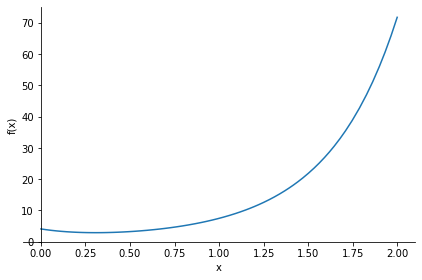

In [33]:
sy.plot(my_f, (x,0,2))

Schauen wir uns nun noch an, wie wir **Anfangswertprobleme**, also Differentialgleichungen zusammen mit entsprechenden Anfangsbedingungen, lösen können. Ruft man mit `sp.dsolve?` den Hilfetext zur Funktion `dsolve` auf, stößt man schnell auf den Parameter `ics`. Dieser soll ein Dictionary sein, welches alle Anfangs- und Randbedingungen beinhaltet. Dafür soll folgende Syntax genutzt werden:

In [34]:
initial_conditions = {y(0)                    : 0, # y(0) = 0
                      y(x).diff(x).subs(x, 0) : 1} # y'(0)= 1

Wir haben hier die Anfangsbedingungen $y(0)=0$ und $y'(0)=1$ vorgegeben. Der Aufruf von `dsolve` ergibt nun:

In [35]:
sol = sy.dsolve(ode, y(x), ics=initial_conditions)
f = sol.rhs
f

exp(3*x)/9 + (-1/18 + 5*sqrt(7)/126)*exp(x*(-1 + sqrt(7))) + (-5*sqrt(7)/126 - 1/18)*exp(x*(-sqrt(7) - 1))

Offensichtlich hängt die Lösung nur noch von der Variablen $x$ ab. Klar, da die Konstanten in der allgemeinen Lösung durch die Anfangsbedingungen eliminiert wurden.

`f` aus oberem Block ist wieder ein mathematischer Ausdruck, mit dem wir wie gewohnt weiter arbeiten können:

f ist vom Typ <class 'sympy.core.add.Add'>


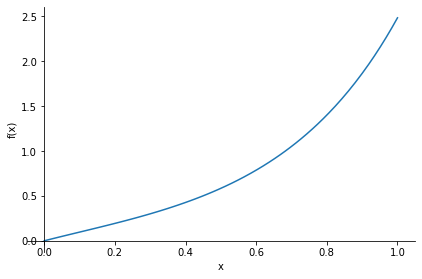

In [36]:
print("f ist vom Typ", type(f))
sy.plot(f, (x,0,1))

In folgendem Beispiel wird die Riccati-Differentialgleichung

$$
y'(x) + y(x)^2+\frac{2}{x}\,y(x) = -\frac{2}{x^2}
$$

gelöst. Interessant ist auch die Ausgabe der Funktion `sympy.classify_ode(...)`. SymPy analysiert die Differentialgleichung und wendet, abhängig von der Klassifikation der Gleichng, eine entsprechende Lösungsstrategie an:

In [37]:
ode = sy.Derivative(y(x),x) + y(x)**2 + 2/x*y(x) + 2/(x**2)
sy.classify_ode(ode)

('1st_rational_riccati',
 'Riccati_special_minus2',
 'separable_reduced',
 'lie_group',
 'separable_reduced_Integral')

In [38]:
sol = sy.dsolve(ode, y(x))
sol

Eq(y(x), (-sqrt(7)*tan(C1 + sqrt(7)*log(x)/2) - 1)/(2*x))

In [39]:
f = sol.rhs
my_f = f.subs('C1', 1)
my_f

(-sqrt(7)*tan(sqrt(7)*log(x)/2 + 1) - 1)/(2*x)